# Predicting Graduate Employability using Supvervised Learning

This project will explore different ways to predict Graduate Employability using Supervised Learning on the Kaggle "Graduate Employability Dataset", found at URL: https://www.kaggle.com/datasets/sidraaazam/graduate-employability-dataset 

Note that for this project, I chose to download the .csv file directly to my machine. I've prevented it from uploading to git using .gitignore. If you would like to replicate this code, you'll need to download the csv from the abovementioned kaggle link. 

This project required 3 deliverables:
1. This notebook
2. A video presentation (powerpoint slides will be available on Git)
3. A public GitHub repository, found here: https://github.com/Kate-Zilla/Graduate-Employability

First, I'll start with import statements:

In [1]:
%matplotlib inline
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import statsmodels.formula.api as smf
import statsmodels.api as sm
import os
from sklearn.model_selection import train_test_split
from math import exp
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# EDA: exploratory data analysis
Here I will load and inspect the data

In [2]:
df = pd.read_csv('CollegePlacement.csv')
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [4]:
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


This reveals that there are 9 columns, including both placement and ID, that contain either object, int, or float dtypes. 

Below, I will display the unique values that exist in each column that has dtype == object. 

In [5]:
for c in df.columns:
    if df[c].dtype == 'object':
        print(c, df[c].unique())

College_ID ['CLG0030' 'CLG0061' 'CLG0036' 'CLG0055' 'CLG0004' 'CLG0015' 'CLG0071'
 'CLG0096' 'CLG0097' 'CLG0057' 'CLG0063' 'CLG0077' 'CLG0064' 'CLG0017'
 'CLG0053' 'CLG0040' 'CLG0070' 'CLG0050' 'CLG0068' 'CLG0072' 'CLG0034'
 'CLG0087' 'CLG0073' 'CLG0024' 'CLG0008' 'CLG0025' 'CLG0018' 'CLG0014'
 'CLG0006' 'CLG0082' 'CLG0090' 'CLG0075' 'CLG0094' 'CLG0089' 'CLG0016'
 'CLG0076' 'CLG0047' 'CLG0054' 'CLG0058' 'CLG0100' 'CLG0046' 'CLG0001'
 'CLG0041' 'CLG0093' 'CLG0027' 'CLG0062' 'CLG0081' 'CLG0028' 'CLG0020'
 'CLG0051' 'CLG0069' 'CLG0088' 'CLG0038' 'CLG0029' 'CLG0035' 'CLG0019'
 'CLG0005' 'CLG0026' 'CLG0066' 'CLG0045' 'CLG0043' 'CLG0074' 'CLG0048'
 'CLG0012' 'CLG0099' 'CLG0011' 'CLG0091' 'CLG0083' 'CLG0080' 'CLG0044'
 'CLG0059' 'CLG0031' 'CLG0039' 'CLG0065' 'CLG0079' 'CLG0095' 'CLG0085'
 'CLG0033' 'CLG0007' 'CLG0037' 'CLG0032' 'CLG0049' 'CLG0056' 'CLG0084'
 'CLG0067' 'CLG0098' 'CLG0042' 'CLG0021' 'CLG0009' 'CLG0010' 'CLG0078'
 'CLG0013' 'CLG0003' 'CLG0092' 'CLG0086' 'CLG0023' 'CLG0022' 'CLG0

I will drop the college_ID column as identification number should have zero implications on whether or not someone is hired. The Placement column will be my target, as i will want to know whether or not a student is placed (employed). 

In [6]:
df = df.drop(['College_ID'], axis=1)

I will also map the internship experience and placement columns from "Yes", "No" to 1, 0 

In [7]:
df['Placement'] = df['Placement'].map({'Yes': 1, 'No': 0})
df['Internship_Experience'] = df['Internship_Experience'].map({'Yes': 1, 'No': 0})

now I will make a pandas correlation matrix. 

In [8]:
df.corr(numeric_only=True)

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
IQ,1.000000,-0.002640,-0.002859,-0.006827,-0.000247,-0.003458,-0.010896,0.014538,0.285914
Prev_Sem_Result,-0.002640,1.000000,0.980768,-0.005765,-0.013347,0.009326,-0.017269,0.018434,0.317896
CGPA,-0.002859,0.980768,1.000000,-0.002958,-0.012562,0.011441,-0.018242,0.020872,0.321607
Academic_Performance,-0.006827,-0.005765,-0.002958,1.000000,0.025903,0.011774,-0.019733,-0.013148,-0.014920
Internship_Experience,-0.000247,-0.013347,-0.012562,0.025903,1.000000,0.002093,-0.020437,-0.010260,-0.005841
Extra_Curricular_Score,-0.003458,0.009326,0.011441,0.011774,0.002093,1.000000,0.003769,0.008122,-0.004740
Communication_Skills,-0.010896,-0.017269,-0.018242,-0.019733,-0.020437,0.003769,1.000000,-0.004486,0.323155
Projects_Completed,0.014538,0.018434,0.020872,-0.013148,-0.010260,0.008122,-0.004486,1.000000,0.217499
Placement,0.285914,0.317896,0.321607,-0.014920,-0.005841,-0.004740,0.323155,0.217499,1.000000


here is a heatmap of the above correlation matrix

<Axes: >

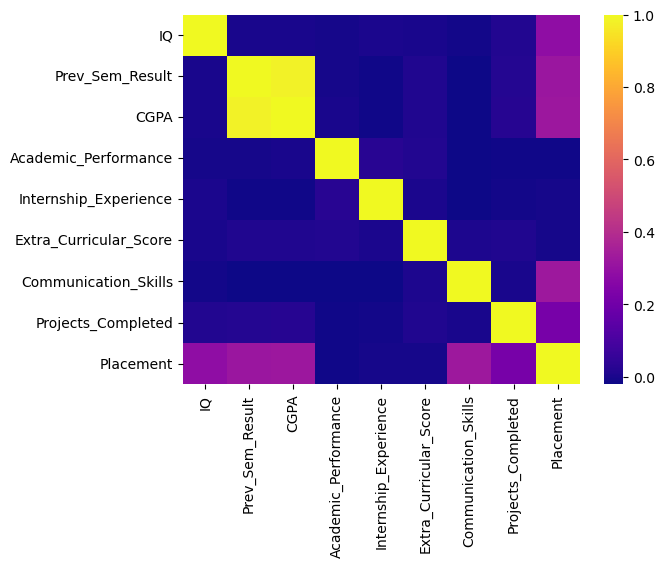

In [9]:
sns.heatmap(df.corr(numeric_only=True),cmap="plasma")

There's not a lot of strong correlation shown here, except the previous semester's GPA and current GPA are strongly correlated. I'll drop the previous semester's GPA since I do not need both. 

In [10]:
df = df.drop(['Prev_Sem_Result'],axis=1)

In [11]:
df.head()

,IQ,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.28,8,0,8,8,4,0
1,97,5.37,8,0,7,8,0,0
2,109,5.83,9,0,3,1,1,0
3,122,5.75,6,1,1,6,1,0
4,96,7.69,7,0,8,10,2,0


here's the consolidated dataset info:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IQ                      10000 non-null  int64  
 1   CGPA                    10000 non-null  float64
 2   Academic_Performance    10000 non-null  int64  
 3   Internship_Experience   10000 non-null  int64  
 4   Extra_Curricular_Score  10000 non-null  int64  
 5   Communication_Skills    10000 non-null  int64  
 6   Projects_Completed      10000 non-null  int64  
 7   Placement               10000 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 625.1 KB


# Simple Linear Regression
Here I'll analyze the data using a simple linear regression model

In [13]:
#I'll do an 80/20 split
X_train, X_test = train_test_split(df, test_size = 0.2)

#print
print(len(X_train))
print(len(X_test))

8000
2000


Here, I'm just curious what CGPA does to Placement. I will run further tests, this is just an initial look. 

In [14]:
model = smf.ols(formula ='Placement ~ CGPA', data=X_train).fit()
print(model.summary())
adj_R2 = model.rsquared_adj

                            OLS Regression Results                            
Dep. Variable:              Placement   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     904.5
Date:                Thu, 02 Oct 2025   Prob (F-statistic):          2.31e-188
Time:                        14:13:24   Log-Likelihood:                -3006.5
No. Observations:                8000   AIC:                             6017.
Df Residuals:                    7998   BIC:                             6031.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4411      0.021    -21.460      0.0

That gave a fairly low R-squared value, so I predict there will be a better predictor in the context of linear regression. Below I will find the top 3 predictors. 

In [15]:
predictors = X_train.columns.drop('Placement')
adj_r2_scores = {}

for predictor in predictors:
    formula = f'Placement ~ {predictor}'
    model = smf.ols(formula=formula, data = X_train).fit()
    adj_r2_scores[predictor] = model.rsquared_adj
    
sorted_predictors = sorted(adj_r2_scores.items(), key = lambda x: x[1], reverse = True)

#getting my top three
top_three = [predictor for predictor, score in sorted_predictors[:3]]
print(top_three)

['CGPA', 'Communication_Skills', 'IQ']


Interesting that CGPA ended up being a top predictor. This shows me that a linear regression model might not be the best choice.  

# MultiLinear Regression
Here I'll apply Multiple Linear Regression to further analyze these potential predictors.

In [16]:
#top 3 predictors from prior step = CGPA, Communication Skills, IQ
mult_formula = 'Placement ~ CGPA + Communication_Skills + IQ'
multilinear_model = smf.ols(formula = mult_formula, data = df).fit()
print(multilinear_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Placement   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     1402.
Date:                Thu, 02 Oct 2025   Prob (F-statistic):               0.00
Time:                        14:20:56   Log-Likelihood:                -2545.0
No. Observations:               10000   AIC:                             5098.
Df Residuals:                    9996   BIC:                             5127.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.4113 

## Interpretation of multiliear results: 
The R-squared of 29.6% shows that 29.6% of the variation in Placement outcomes can be explained by the three factors tested above. While it's not a strong fit, it's not necessarily meaningless. The F-statistic shows that the model as a whole is statistically significant, which means that at least one of these predictors is strongly related to Placement. 

From these results, I can infer that this model is not capturing most of the variation, so I will move on to a different model.